In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Exploratory Data Analysis Part 1: General (no emissions)
#### In this notebook, we will examine all the "static" variables like vehicle type etc., plus odometer (mile count)

## Loading data frame

In [3]:
data_path = '../data/'
df = pd.read_csv(data_path + 'sample.csv', parse_dates=['TEST_SDATE', 'TEST_EDATE'], lineterminator='\n')


## Trim the dataframe
#### Only keep columns not pertaining to emissions, reduce the target variable to passes, fails and aborts

In [4]:
keep_cols = ['VIR_CERT_NUMBER', 'STATION_NUM', 'ANALYZER_NUM', 'INSPECTOR_NUM', 'TEST_SDATE', 'TEST_EDATE', 'VIN', 'VIN_SOURCE', 'VEH_LICENSE', 'GVW_TYPE', 'GVWR', 'MODEL_YEAR', 
             'MAKE', 'MODEL', 'CYL', 'ENGINE_SIZE', 'TRANS_TYPE', 'DUAL_EXHAUST', 'ODOMETER', 'FUEL_TYPE', 'VEHICLE_TYPE', 'ZIP_CODE', 'CERTIFICATION', 'ESC', 'VRT_RECORD_ID', 
             'ABORT_CODE', 'SOFTWARE_VERSION', 'INSP_COMMENTS', 'OVERALL_RESULT', 'ABORT_CODE_OTHER_DESC', 'MECHANIC_LAST_NAME', 'MECHANIC_FIRST_NAME', 'MECHANIC_MIDDLE_INIT', 
             'ENGINE_SIZE_ORIG', 'VID_TEST_TYPE']

df = df[keep_cols]

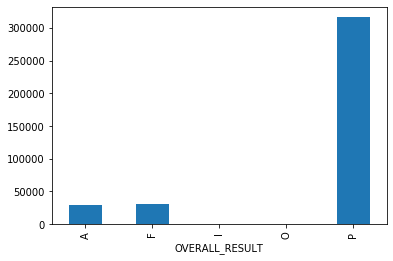

In [6]:
df.groupby('OVERALL_RESULT').size().plot.bar()
plt.show()

In [7]:
df = df[df.OVERALL_RESULT.isin(['P', 'F', 'A'])]

## STATION_NUM
#### The number of the station where the check was done. How many unique values are there and how are they distributed?

In [8]:
len(set(df.STATION_NUM.values))

262

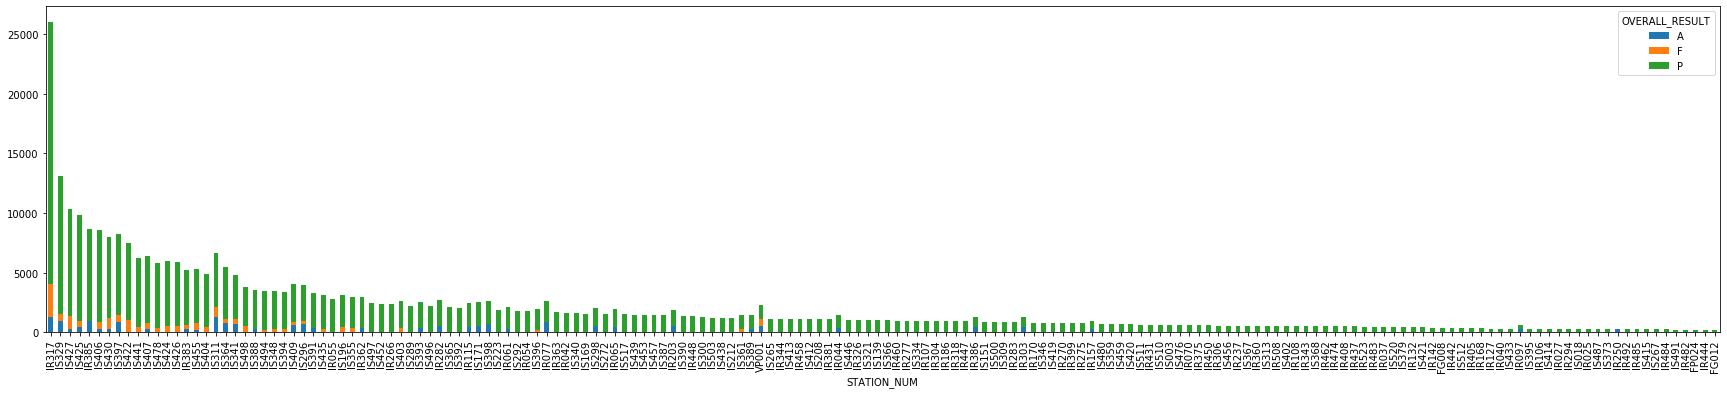

In [10]:
fig, ax = plt.subplots(figsize=(30,6))
df.groupby(['STATION_NUM', 'OVERALL_RESULT']).size().sort_values(ascending=False).head(240).unstack().plot.bar(stacked=True, ax=ax)
plt.show()

#### Are there irregularities concerning the ratio of passes, fails and aborts among the stations? Let's look at the top 20 locations

In [11]:
top_indices = df.groupby(['STATION_NUM']).size().sort_values(ascending=False).head(20).index

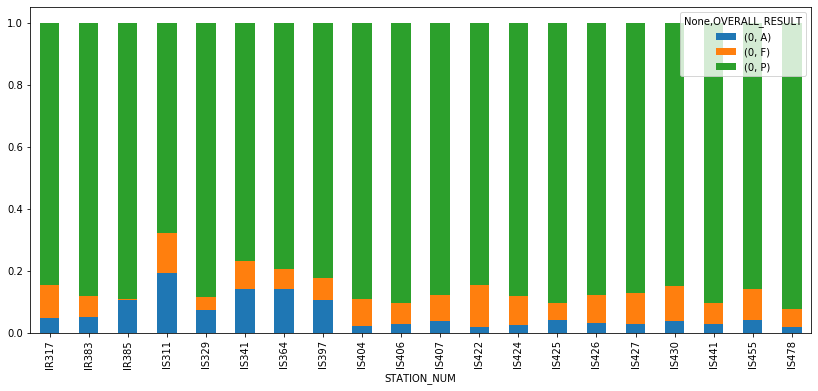

In [12]:
fig, ax = plt.subplots(figsize=(14,6))
top_stations = df[df.STATION_NUM.isin(top_indices)]
pd.DataFrame(top_stations.groupby(['STATION_NUM','OVERALL_RESULT']).size()/top_stations.groupby('STATION_NUM').size()).unstack().fillna(0).plot.bar(ax=ax, stacked=True)
plt.show()

#### Let's look at a particular station that seems to display major irregularities. Is has extremely high percentages of fails and aborts

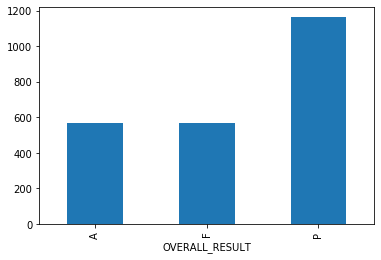

In [15]:
df[df.STATION_NUM == 'VP001'].groupby('OVERALL_RESULT').size().plot.bar()
plt.show()

## Look at aborted tests

In [16]:
abort_df = df[df.OVERALL_RESULT == 'A']
abort_df[['ABORT_CODE', 'ABORT_CODE_OTHER_DESC']]

,ABORT_CODE,ABORT_CODE_OTHER_DESC
2,99.0,NaN
27,99.0,NaN
47,99.0,wrong vin
54,99.0,NaN
59,99.0,NaN
...,...,...
375327,99.0,no voltage recorded
375348,99.0,NaN
375422,99.0,NaN
375436,99.0,NaN


In [17]:
abort_df[abort_df.ABORT_CODE_OTHER_DESC.notna()].ABORT_CODE_OTHER_DESC

47                              wrong vin
154                no adaptor for gas cap
190                               MISFIRE
216       OBDII Secondary Readiness Abort
241                             wrong key
                       ...               
373798                       forgot money
374173                           continue
374905                                mal
374908                                mal
375327                no voltage recorded
Name: ABORT_CODE_OTHER_DESC, Length: 3047, dtype: object

#### There are 2033 datapoints with additional information on why the check was aborted. There might be valuable information for understanding how the checks work in general

In [ ]:
abort_df.isnull()#.any()

,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_SDATE,TEST_EDATE,VIN,VIN_SOURCE,VEH_LICENSE,GVW_TYPE,GVWR,MODEL_YEAR,MAKE,MODEL,CYL,ENGINE_SIZE,TRANS_TYPE,DUAL_EXHAUST,ODOMETER,FUEL_TYPE,VEHICLE_TYPE,ZIP_CODE,CERTIFICATION,ESC,VRT_RECORD_ID,ABORT_CODE,SOFTWARE_VERSION,INSP_COMMENTS,OVERALL_RESULT,ABORT_CODE_OTHER_DESC,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,VID_TEST_TYPE
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,True
27,True,False,False,False,False,False,False,False,False,True,False,False,True,True,True,False,True,True,False,True,False,True,True,True,False,False,False,True,False,True,False,False,True,True,True
47,True,False,False,False,False,False,False,False,True,True,False,False,True,True,True,False,True,True,False,True,False,True,True,True,False,False,False,True,False,False,False,False,False,True,True
54,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,True,True
59,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234961,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,True
234968,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,True
234997,True,False,False,False,False,False,False,False,False,True,False,False,True,True,True,False,True,True,False,True,False,True,True,True,False,False,False,True,False,True,False,False,False,True,True
235045,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False


In [ ]:
df[df.OVERALL_RESULT != 'A'].isnull()#.any()

,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_SDATE,TEST_EDATE,VIN,VIN_SOURCE,VEH_LICENSE,GVW_TYPE,GVWR,MODEL_YEAR,MAKE,MODEL,CYL,ENGINE_SIZE,TRANS_TYPE,DUAL_EXHAUST,ODOMETER,FUEL_TYPE,VEHICLE_TYPE,ZIP_CODE,CERTIFICATION,ESC,VRT_RECORD_ID,ABORT_CODE,SOFTWARE_VERSION,INSP_COMMENTS,OVERALL_RESULT,ABORT_CODE_OTHER_DESC,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,VID_TEST_TYPE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,True,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,True,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235171,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,True,False
235172,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,True,False
235173,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False
235174,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False


In [ ]:
abort_df[abort_df.VIR_CERT_NUMBER.isna()]

,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_SDATE,TEST_EDATE,VIN,VIN_SOURCE,VEH_LICENSE,GVW_TYPE,GVWR,MODEL_YEAR,MAKE,MODEL,CYL,ENGINE_SIZE,TRANS_TYPE,DUAL_EXHAUST,ODOMETER,FUEL_TYPE,VEHICLE_TYPE,ZIP_CODE,CERTIFICATION,ESC,VRT_RECORD_ID,ABORT_CODE,SOFTWARE_VERSION,INSP_COMMENTS,OVERALL_RESULT,ABORT_CODE_OTHER_DESC,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,VID_TEST_TYPE
2,NaN,IR354,W109,32641547,2004-08-31 13:03:00,2004-08-31 13:03:00,KNJBT06K2K6116760,M,NP116760,1.0,2000,1989,FORD,FESTIVA,4,1300,M,N,110347,G,1,87108,F,4.0,890199,99.0,140.0,NaN,A,NaN,Anderson,Phillip,L,NaN,NaN
27,NaN,IS196,W104,8060417,2004-10-31 12:16:00,2004-10-31 12:16:00,JT4RN62D5G0084290,M,906,NaN,0,0,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,0,99.0,141.0,NaN,A,NaN,HICKS,JOHN,NaN,NaN,NaN
47,NaN,IS309,W078,11714840,2004-11-06 11:25:00,2004-11-06 11:25:00,KMHVD14N1XU452074,S,NaN,NaN,0,0,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,0,99.0,141.0,NaN,A,wrong vin,ANDERSON,MICHAEL,S,NaN,NaN
54,NaN,IR250,19,39864363,2004-12-20 14:30:00,2004-12-20 14:30:00,1G2JB124927101864,S,NP101864,NaN,3000,2002,PONTIAC,SUNFIRE,4,2200,A,N,83781,G,1,87110,N,6.0,0,99.0,147.0,NaN,A,NaN,Betanco,Max,NaN,NaN,NaN
59,NaN,IR061,W007,36720077,2004-07-09 11:15:00,2004-07-09 11:15:00,1FTRW07352KC64831,S,NPC64831,NaN,6700,2002,FORD,F150 SUPER CAB - SHOR,8,5400,A,N,11583,G,3,87105,F,20.0,0,99.0,140.0,NaN,A,NaN,SHETTER,RICHARD,NaN,5.4L,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234961,NaN,IR317,W066,37826481,2014-04-25 17:56:00,2014-04-25 17:56:00,KNDJB7234Y5659020,S,121PKB,NaN,3375,2000,KIA,SPORTAGE,4,2000,A,N,162927,G,4,87108,F,20.0,20000374,99.0,502.0,NaN,A,NaN,NGUYEN,HANH,A,NaN,NaN
234968,NaN,IS296,W050,AC083802,2014-06-19 09:53:00,2014-06-19 09:53:00,JTEBT14R240036403,S,GKH815,NaN,5710,2004,TOYOTA,4RUNNER 4WD,8,4700,A,N,126071,G,4,87120,C,20.0,20040527,99.0,502.0,NaN,A,NaN,SANDOVAL,RICHARD,A,NaN,NaN
234997,NaN,IR303,W054,AC083856,2014-04-22 14:20:00,2014-04-22 14:20:00,KMHFG4JG2CA150372,S,NP150372,NaN,0,0,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,0,13.0,502.0,NaN,A,NaN,SALAZAR,ISAAC,J,NaN,NaN
235045,NaN,IS341,W021,32480268,2014-10-23 11:32:00,2014-10-23 11:32:00,JA4FN44L1JA006922,M,JDT697,1.0,5650,1988,MITSUBISHI,VAN,4,2400,A,N,232870,G,5,87102,F,10.0,880506,99.0,502.0,NaN,A,NaN,MIRABAL,ROSALIA,C,NaN,I


#### Nearly all the aborted tests have no VIR

## What is VIR?

In [18]:
df[df.OVERALL_RESULT == 'F'].VIR_CERT_NUMBER

6         4454540.0
10        4458737.0
20        4411006.0
46        4437436.0
48        4427570.0
            ...    
375431    8815996.0
375462    8800400.0
375477    8815716.0
375483    8815013.0
375499    8814451.0
Name: VIR_CERT_NUMBER, Length: 30051, dtype: float64

In [19]:
df.sort_values(['TEST_SDATE', 'VIR_CERT_NUMBER'])

,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_SDATE,TEST_EDATE,VIN,VIN_SOURCE,VEH_LICENSE,GVW_TYPE,GVWR,MODEL_YEAR,MAKE,MODEL,CYL,ENGINE_SIZE,TRANS_TYPE,DUAL_EXHAUST,ODOMETER,FUEL_TYPE,VEHICLE_TYPE,ZIP_CODE,CERTIFICATION,ESC,VRT_RECORD_ID,ABORT_CODE,SOFTWARE_VERSION,INSP_COMMENTS,OVERALL_RESULT,ABORT_CODE_OTHER_DESC,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,VID_TEST_TYPE
5246,4400108.0,IS329,WO36,21628635,2004-05-03 16:13:00,2004-05-03 16:16:00,1FAFP52U1WA230450,S,CLL409,1.0,3625,1998,FORD,TAURUS,6,3000,A,N,88982,G,1,87107,F,6.0,0,NaN,132,NaN,P,NaN,Sanchez,Leroy,NaN,3.0L,I
9093,4400130.0,IS329,WO36,26351553,2004-05-04 10:48:00,2004-05-04 10:53:00,1B7FL23X0PS278269,M,102FDG,1.0,5000,1993,DODGE,DAKOTA,6,3900,A,N,112376,G,3,87109,F,11.0,930085,NaN,132,NaN,P,NaN,Sanchez,Tim,NaN,NaN,I
3337,4400131.0,IS329,WO36,26351553,2004-05-04 10:55:00,2004-05-04 10:57:00,2MELM75W9VX659371,S,819KYX,1.0,4000,1997,MERCURY,GRAND MARQUIS,8,4600,A,N,39121,G,1,87107,F,6.0,970160,NaN,132,NaN,P,NaN,Sanchez,Tim,NaN,NaN,I
7975,4400134.0,IS329,WO36,26351553,2004-05-04 11:16:00,2004-05-04 11:21:00,J81RF2366P7512165,S,987JWZ,1.0,2625,1993,GEO,STORM,4,1600,M,N,131174,G,1,87105,F,5.0,930393,NaN,132,NaN,P,NaN,Sanchez,Tim,NaN,NaN,I
6509,4400141.0,IS329,WO36,26351553,2004-05-04 12:52:00,2004-05-04 13:03:00,2GCEK19K8P1173368,S,DTP074,2.0,6600,1993,CHEVROLET,C1500 PICKUP,8,5700,M,N,117314,G,3,87107,F,16.0,930305,NaN,132,NaN,P,NaN,Sanchez,Tim,NaN,NaN,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375494,8821822.0,IS397,W165,AC086625,2019-12-31 15:40:19,2019-12-31 15:45:25,YV140MEK9G1287405,S,NP287405,1.0,4740,2016,VOLVO,V60,4,2000,A,N,66450,G,1,87123,C,6.0,0,NaN,250,NaN,P,NaN,VALADEZRODRIGUEZ,MARCOS,NaN,2.0L,NaN
375495,8808641.0,IR044,W780,AC083775,2019-12-31 15:59:13,2019-12-31 16:02:14,KMHDH4AE3EU136436,S,NP136436,1.0,3880,2014,HYUNDAI,ELANTRA,4,1800,A,N,95908,G,1,87114,C,6.0,0,NaN,250,NaN,P,NaN,NGUYEN,DUC,D,1.8L,NaN
375497,8821021.0,IS497,W042,AC084266,2019-12-31 16:58:15,2019-12-31 17:01:09,1FAHP2E89FG203290,S,714TJD,1.0,5260,2015,FORD,TAURUS,6,3500,A,N,43309,G,1,87110,F,6.0,0,NaN,250,NaN,P,NaN,Allen,Michael,S,NaN,NaN
375498,8811168.0,IR170,W092,AC086427,2019-12-31 17:08:07,2019-12-31 17:11:55,KM8JU3AC5DU556706,S,PLR585,1.0,4497,2013,HYUNDAI,TUCSON,4,2400,A,N,57252,G,4,87114,C,20.0,0,NaN,250,NaN,P,NaN,CROSLEY,DORIAN,G,2.4L,NaN


#### Aborted tests generate no report. Is it ok to simply exclude them from our dataset? 

In [20]:
df_w_abort = df
df = df[df.OVERALL_RESULT != 'A']

## Look at the date information

### by date

In [21]:
df['SDATE'] = df.TEST_SDATE.apply(lambda x: x.date())
df['EDATE'] = df.TEST_EDATE.apply(lambda x: x.date())

In [22]:
df['DATE_DIST'] = df.EDATE - df.SDATE

In [23]:
df[df.DATE_DIST != '0 days']

,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_SDATE,TEST_EDATE,VIN,VIN_SOURCE,VEH_LICENSE,GVW_TYPE,GVWR,MODEL_YEAR,MAKE,MODEL,CYL,ENGINE_SIZE,TRANS_TYPE,DUAL_EXHAUST,ODOMETER,FUEL_TYPE,VEHICLE_TYPE,ZIP_CODE,CERTIFICATION,ESC,VRT_RECORD_ID,ABORT_CODE,SOFTWARE_VERSION,INSP_COMMENTS,OVERALL_RESULT,ABORT_CODE_OTHER_DESC,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,VID_TEST_TYPE,SDATE,EDATE,DATE_DIST
14392,4603988.0,IR050,W079,10185203,2005-06-29 17:26:00,2005-06-30 07:42:00,JT2BG22KXW0235411,S,BG079,1.0,3500,1998,TOYOTA,CAMRY,4,2200,A,N,87000,G,1,87109,F,6.0,0,NaN,147,NaN,P,Test Time Expiration,VELASQUEZ,GILBERT,I,NaN,I,2005-06-29,2005-06-30,1 days
23556,4631116.0,IR282,W015,19772826,2005-09-08 16:36:00,2005-09-09 07:22:00,4S6CK58W9X4425607,S,NP425607,1.0,4700,1999,HONDA,PASSPORT,6,3500,A,N,77556,G,4,87124,F,20.0,0,NaN,150,NaN,F,NaN,NERI,DAVID,G,3.5L,I,2005-09-08,2005-09-09,1 days
68647,5262454.0,IR385,W121,31981,2007-08-08 23:58:00,2007-08-09 00:03:00,1FTRW07653KD84026,M,NPD84026,1.0,5001,2003,FORD,F150 2WD,8,4600,A,N,38395,G,3,87113,F,20.0,20030160,NaN,158,NaN,P,NaN,SANCHEZ,RAYMOND,J,NaN,I,2007-08-08,2007-08-09,1 days
82975,5082616.0,IR385,W121,46913019,2007-01-09 23:53:00,2007-01-10 00:06:00,JTEBU17R630017389,S,NP017389,1.0,5380,2003,TOYOTA,4RUNNER 4WD,6,4000,A,N,55527,G,4,87113,C,20.0,20030499,NaN,158,NaN,P,NaN,Valdez,John,P,NaN,I,2007-01-09,2007-01-10,1 days
114451,5632921.0,IR405,W137,AC083515,2009-06-29 06:47:00,2000-01-02 09:36:00,1GCGC29R3TE245000,M,452MCL,3.0,8600,1996,CHEVROLET,C2500 PICKUP,8,5700,M,N,187525,G,3,87114,F,20.0,961355,NaN,158,NaN,P,NaN,STUARD,RICKEY,J,NaN,I,2009-06-29,2000-01-02,-3466 days
123825,4824144.0,IS379,W122,8987211,2009-06-26 12:02:00,2003-03-13 03:43:00,1LNLM9742RY655060,S,501JAF,1.0,3875,1994,LINCOLN,CONTINENTAL,6,3800,A,N,100533,G,1,87122,F,5.0,940096,NaN,150,NaN,P,NaN,CHAVEZ,ROBERT,L,NaN,I,2009-06-26,2003-03-13,-2297 days
144867,6055173.0,IR282,W015,AC083572,2010-06-10 23:59:00,2010-06-11 00:03:00,3FAFP08Z76R162277,S,NP162277,1.0,0,2006,FORD,FUSION,4,2300,A,N,23690,G,1,87124,F,6.0,0,NaN,158,NaN,P,NaN,SEELYE,WARREN,R,2.3L,I,2010-06-10,2010-06-11,1 days
158747,6197234.0,IR282,W015,AC083874,2010-11-19 23:54:00,2010-11-20 00:02:00,1J4FA49S31P358635,S,NP358635,1.0,4450,2001,JEEP,WRANGLER,6,4000,M,N,91866,G,4,87124,C,20.0,20010100,NaN,202,NaN,P,NaN,ILLERBRUM,MATHEW,A,NaN,I,2010-11-19,2010-11-20,1 days
163360,6309487.0,IR054,W024,1816144,2011-03-29 17:07:00,2011-03-30 07:34:00,1N4BA41E77C846020,S,NP846020,1.0,3875,2007,NISSAN,MAXIMA,6,3500,A,N,16639,G,1,87110,C,6.0,0,NaN,202,NaN,P,NaN,JASTRAM,JONATHAN,R,NaN,I,2011-03-29,2011-03-30,1 days
165221,6346979.0,IR344,W084,48633145,2011-06-30 18:06:00,2011-07-01 07:43:00,2HGFG21517H707899,S,NP707899,1.0,0,2007,HONDA,CIVICSI,4,2000,M,N,53723,G,1,87109,C,6.0,0,NaN,203,NaN,F,NaN,NUNEZ,SAUL,L,2.0L,I,2011-06-30,2011-07-01,1 days


#### A tiny subset has a test phase of one day or more. It is reasonable to assume that these are nans/outliers

### by test interval

In [24]:
inter_df = df[df.DATE_DIST == '0 days']
inter_df['TEST_INTERVAL'] = inter_df.TEST_EDATE - inter_df.TEST_SDATE

In [25]:
inter_df.TEST_INTERVAL.min(), inter_df.TEST_INTERVAL.max(), inter_df.TEST_INTERVAL.mean(), inter_df.TEST_INTERVAL.median()

(Timedelta('-1 days +23:03:00'),
 Timedelta('0 days 07:41:19'),
 Timedelta('0 days 00:03:55.255323'),
 Timedelta('0 days 00:03:01'))

In [26]:
inter_df['TEST_SECONDS'] = inter_df.TEST_INTERVAL.apply(lambda x: x.seconds)

#### The typical duration of a test is four minutes. There are a few outliers (duration of several hours)

### by time of the day

#### Let's do a simplistic division into four equally long timeframes to get started 

In [29]:
time_df = df.set_index('TEST_SDATE')

In [30]:
morning = ['6:00', '11:59']
afternoon = ['12:00', '17:59']
evening = ['18:00', '23:59']
night = ['0:00', '5:59']

morning_tests = time_df.between_time(morning[0], morning[1])
afternoon_tests = time_df.between_time(afternoon[0], afternoon[1])
evening_tests = time_df.between_time(evening[0], evening[1])
night_tests = time_df.between_time(night[0], night[1])

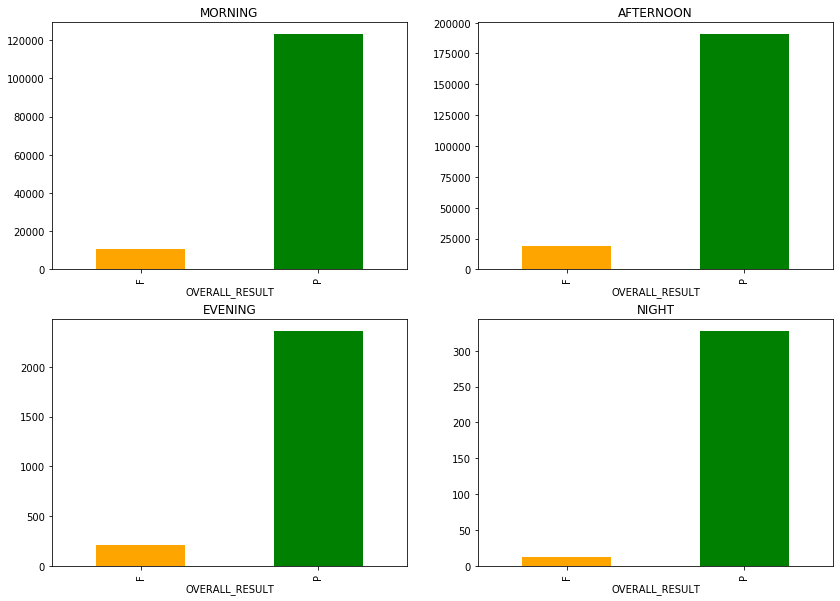

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(14,10))
morning_tests.groupby('OVERALL_RESULT').size().plot.bar(ax=axs[0,0], title='MORNING', color=['orange', 'green'])
afternoon_tests.groupby('OVERALL_RESULT').size().plot.bar(ax=axs[0,1], title='AFTERNOON', color=['orange', 'green'])
evening_tests.groupby('OVERALL_RESULT').size().plot.bar(ax=axs[1,0], title='EVENING', color=['orange', 'green'])
night_tests.groupby('OVERALL_RESULT').size().plot.bar(ax=axs[1,1], title='NIGHT', color=['orange', 'green'])
plt.show()

In [32]:
print('Morning: {:.2f} percent fail'.format(len(morning_tests[morning_tests.OVERALL_RESULT == 'F'])/len(morning_tests)))
print('Afternoon: {:.2f} percent fail'.format(len(afternoon_tests[afternoon_tests.OVERALL_RESULT == 'F'])/len(afternoon_tests)))
print('Evening: {:.2f} percent fail'.format(len(evening_tests[evening_tests.OVERALL_RESULT == 'F'])/len(evening_tests)))
print('Night: {:.2f} percent fail'.format(len(night_tests[night_tests.OVERALL_RESULT == 'F'])/len(night_tests)))

Morning: 0.08 percent fail
Afternoon: 0.09 percent fail
Evening: 0.08 percent fail
Night: 0.04 percent fail


#### The fail rate for nightly tests is very low. What about aborts?

In [33]:
time_df_a = df_w_abort.set_index('TEST_SDATE')

In [34]:
morning = ['6:00', '11:59']
afternoon = ['12:00', '17:59']
evening = ['18:00', '23:59']
night = ['0:00', '5:59']

morning_tests = time_df_a.between_time(morning[0], morning[1])
afternoon_tests = time_df_a.between_time(afternoon[0], afternoon[1])
evening_tests = time_df_a.between_time(evening[0], evening[1])
night_tests = time_df_a.between_time(night[0], night[1])

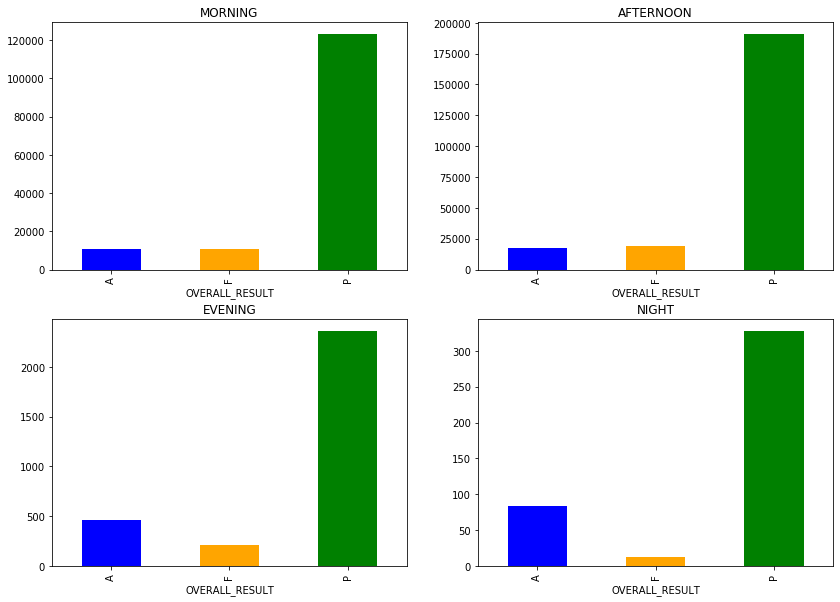

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(14,10))
morning_tests.groupby('OVERALL_RESULT').size().plot.bar(ax=axs[0,0], title='MORNING', color=['blue', 'orange', 'green'])
afternoon_tests.groupby('OVERALL_RESULT').size().plot.bar(ax=axs[0,1], title='AFTERNOON', color=['blue', 'orange', 'green'])
evening_tests.groupby('OVERALL_RESULT').size().plot.bar(ax=axs[1,0], title='EVENING', color=['blue', 'orange', 'green'])
night_tests.groupby('OVERALL_RESULT').size().plot.bar(ax=axs[1,1], title='NIGHT', color=['blue', 'orange', 'green'])
plt.show()

In [36]:
print('Morning: {:.2f} percent fail'.format(len(morning_tests[morning_tests.OVERALL_RESULT == 'A'])/len(morning_tests)))
print('Afternoon: {:.2f} percent fail'.format(len(afternoon_tests[afternoon_tests.OVERALL_RESULT == 'A'])/len(afternoon_tests)))
print('Evening: {:.2f} percent fail'.format(len(evening_tests[evening_tests.OVERALL_RESULT == 'A'])/len(evening_tests)))
print('Night: {:.2f} percent fail'.format(len(night_tests[night_tests.OVERALL_RESULT == 'A'])/len(night_tests)))

Morning: 0.08 percent fail
Afternoon: 0.08 percent fail
Evening: 0.15 percent fail
Night: 0.20 percent fail


#### The rate for aborts is very high in the evening and at night. Why? Also, compared to the total number of tests, only a tiny fraction is done at night. It might be safe to assume that these are irregular tests and exclude them altogether.

## Calculate car age
#### To calculate the age of the car, we subtract the model year from the test date. To account for the negative 1, we simply add 1 to all ages.

In [37]:
df['AGE'] = pd.to_datetime(df["TEST_EDATE"]).dt.year - df["MODEL_YEAR"]

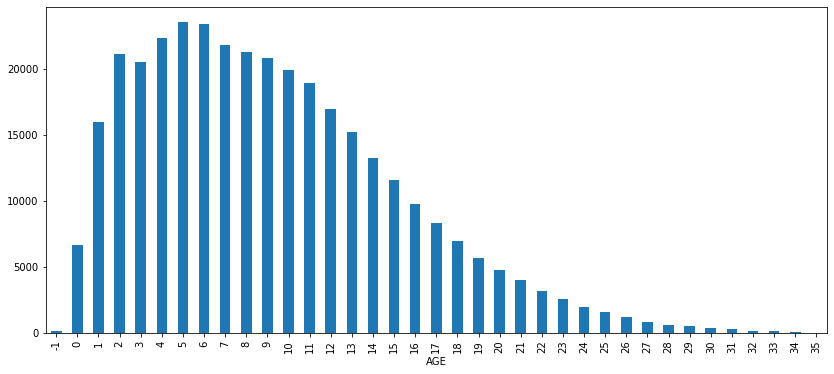

In [38]:
fig, ax = plt.subplots(figsize=(14,6))
df.groupby('AGE').size().plot.bar()
plt.show()

In [39]:
df['AGE'] += 1

#### Let's look at test results by model year / age

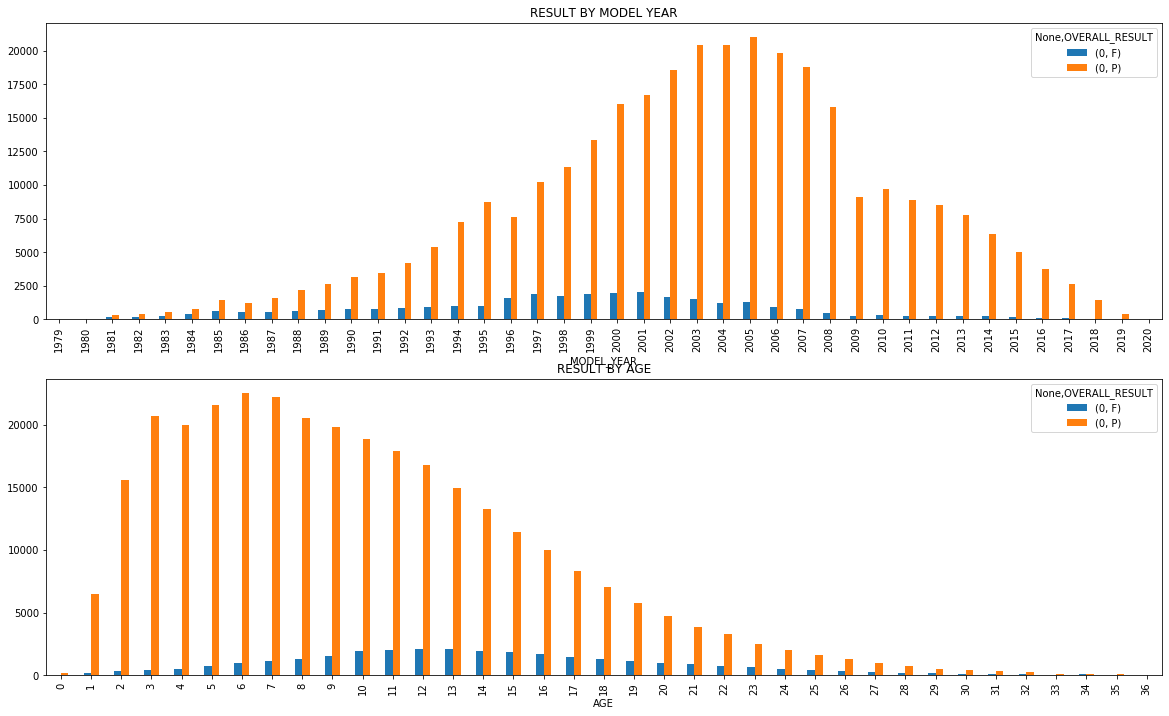

In [40]:
fig, ax = plt.subplots(2, 1, figsize=(20,12))
pd.DataFrame(df.groupby(['MODEL_YEAR','OVERALL_RESULT']).size()).unstack().fillna(0).plot.bar(ax=ax[0], title='RESULT BY MODEL YEAR')
pd.DataFrame(df.groupby(['AGE','OVERALL_RESULT']).size()).unstack().fillna(0).plot.bar(ax=ax[1], title='RESULT BY AGE')
plt.show()

#### Normalize by group to see the ratios more clearly 

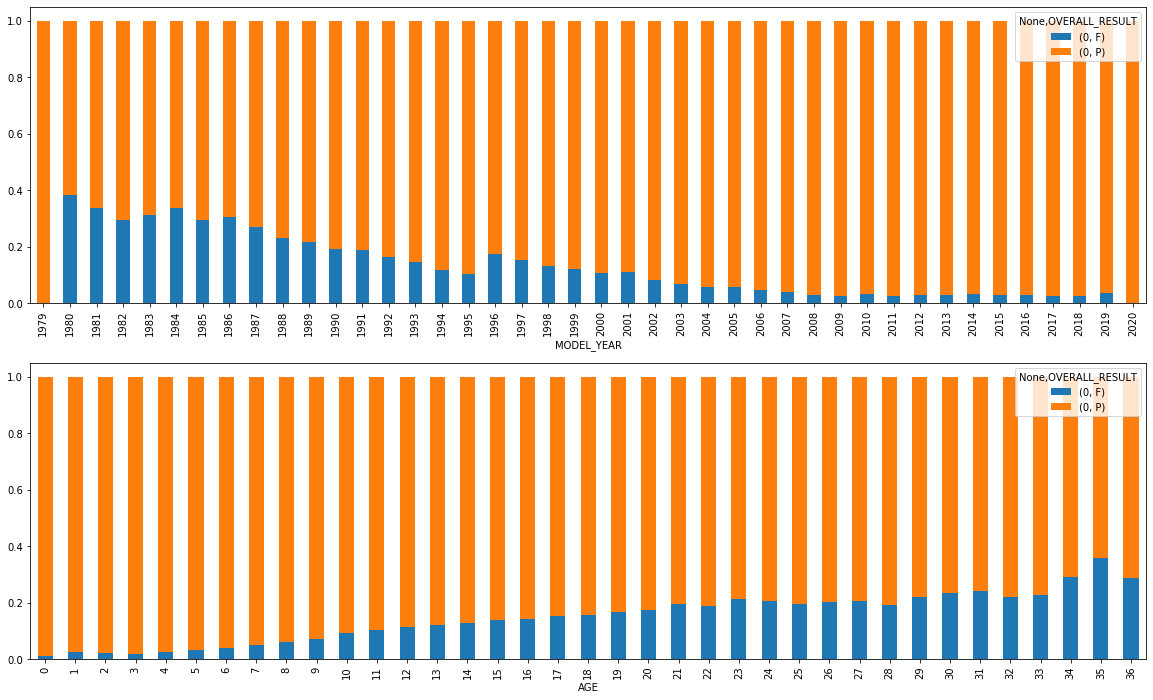

In [41]:
fig, ax = plt.subplots(2, 1, figsize=(20,12))
pd.DataFrame(df.groupby(['MODEL_YEAR','OVERALL_RESULT']).size()/df.groupby('MODEL_YEAR').size()).unstack().fillna(0).plot.bar(ax=ax[0], stacked=True)
pd.DataFrame(df.groupby(['AGE','OVERALL_RESULT']).size()/df.groupby('AGE').size()).unstack().fillna(0).plot.bar(ax=ax[1], stacked=True)
plt.show()

In [42]:
len(df[df.AGE == 30]), len(df[df.AGE == 31]), len(df[df.AGE == 32]), len(df[df.AGE == 33]), len(df[df.AGE == 34])

(514, 387, 275, 158, 159)

#### Why do very young vehicles fail the test? (open question)

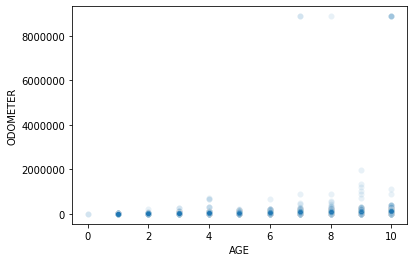

In [43]:
sns.scatterplot(data=df[(df.AGE < 11) & (df.OVERALL_RESULT == 'F')], x='AGE', y='ODOMETER', alpha=.1)
plt.show()

## odometer
#### When plotting the odometer values, we see a slight curve pattern, as well as a "line" of datapoints at an improbably high value  

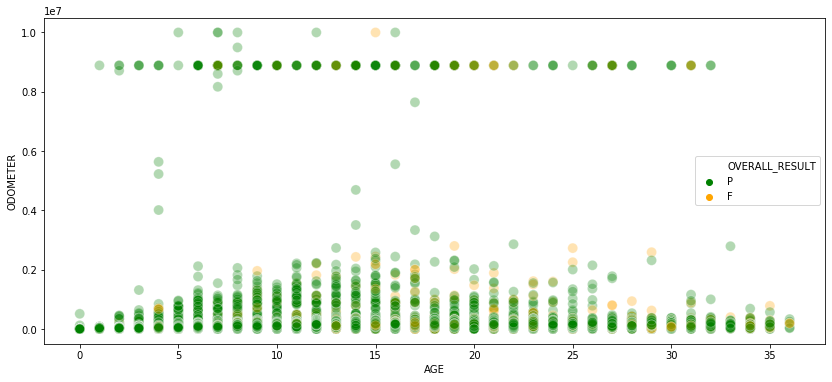

In [44]:
fig, ax = plt.subplots(figsize=(14,6))
colordict={'P': 'green', 'F': 'orange'}
sns.scatterplot(data=df, x='AGE', y='ODOMETER', hue='OVERALL_RESULT', s=100, alpha=.3, palette=colordict)
plt.show()

In [ ]:
len(df[df.ODOMETER.isna()]), len(df[df.ODOMETER == 0])

(0, 334)

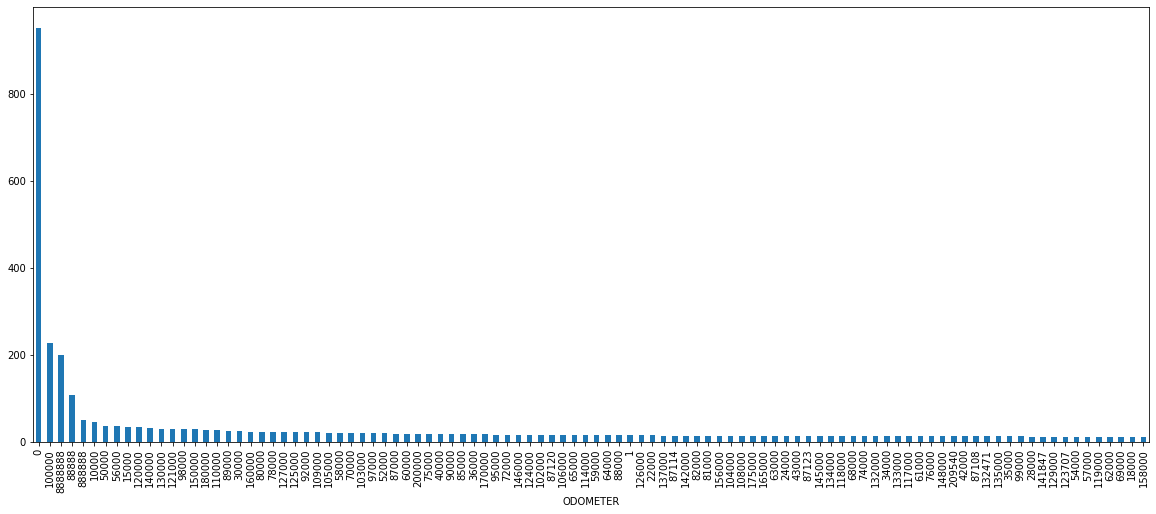

In [45]:
fig, ax = plt.subplots(figsize=(20,8))
df.groupby('ODOMETER').size().sort_values(ascending=False).head(100).plot.bar()
plt.show()

#### Some values clearly occur suspiciously often (e.g. 8888, 88888... ) Exclude impossible values to see the pattern more clearly 

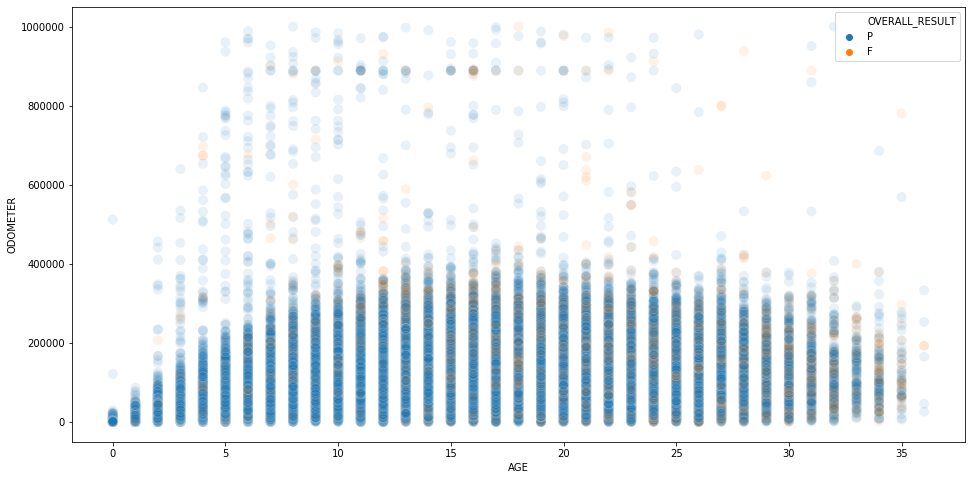

In [46]:
fig, ax = plt.subplots(figsize=(16,8))
sns.scatterplot(data=df[(df.ODOMETER < 1000000) & (df.ODOMETER > 0)], x='AGE', y='ODOMETER', hue='OVERALL_RESULT', s=100, alpha=.1)
plt.show()

#### Are strange values used by the same people / at the same stations?

In [47]:
df['MECHANIC_LAST_NAME'] = df.MECHANIC_LAST_NAME.str.capitalize()
df['MECHANIC_FIRST_NAME'] = df.MECHANIC_FIRST_NAME.str.capitalize()
df['MECHANIC_NAME'] = df.MECHANIC_FIRST_NAME + '_' + df.MECHANIC_MIDDLE_INIT + '_' + df.MECHANIC_LAST_NAME

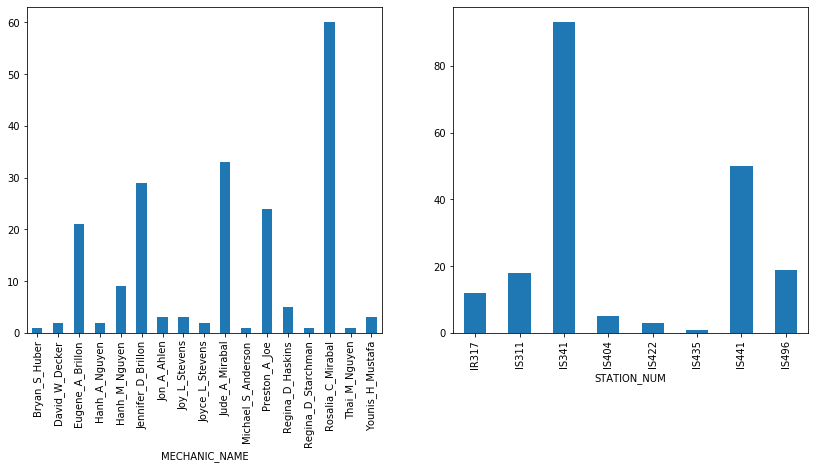

In [48]:
#df[df.ODOMETER.astype(str).str.match('8{5,7}')].groupby('ANALYZER_NUM').size().plot.bar()
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
df[df.ODOMETER == 8888888].groupby('MECHANIC_NAME').size().plot.bar(ax=axs[0])
df[df.ODOMETER == 8888888].groupby('STATION_NUM').size().plot.bar(ax=axs[1])
plt.show()

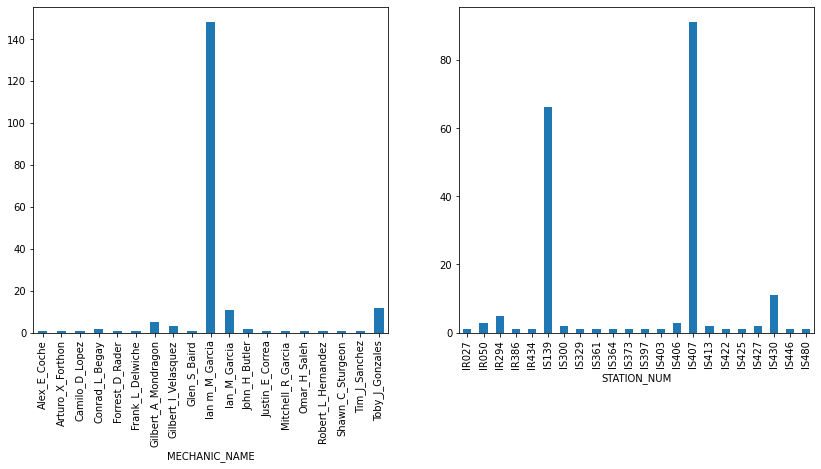

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
df[df.ODOMETER == 100000].groupby('MECHANIC_NAME').size().plot.bar(ax=axs[0])
df[df.ODOMETER == 100000].groupby('STATION_NUM').size().plot.bar(ax=axs[1])
plt.show()

In [49]:
garcia_df = df[df.MECHANIC_NAME == 'Ian m_M_Garcia']
dupl_df = garcia_df[garcia_df.duplicated('ODOMETER', keep=False)]
dupl_df.ODOMETER

10642     50000
10796     89000
11074     30000
11336     55000
11506     80000
          ...  
83802    100000
83960     75000
84002     27000
84137     10000
84303     67000
Name: ODOMETER, Length: 436, dtype: int64

#### This mechanic seems to use the 100000 more often for failing cars. but not exclusively

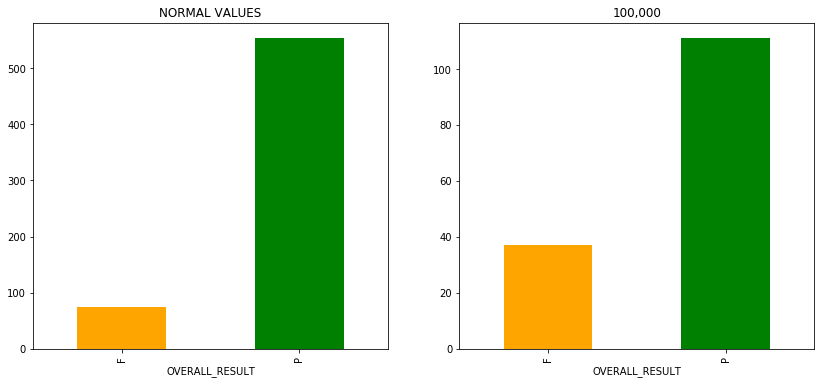

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))
df[(df.MECHANIC_NAME == 'Ian m_M_Garcia')].groupby('OVERALL_RESULT').size().plot.bar(ax = axs[0], color=['orange', 'green'], title='NORMAL VALUES')
df[(df.MECHANIC_NAME == 'Ian m_M_Garcia') & (df.ODOMETER == 100000)].groupby('OVERALL_RESULT').size().plot.bar(ax = axs[1], color=['orange', 'green'], title='100,000')
plt.show()

#### This stations does not seem to follow any pattern related to fails or passes when using the strange value

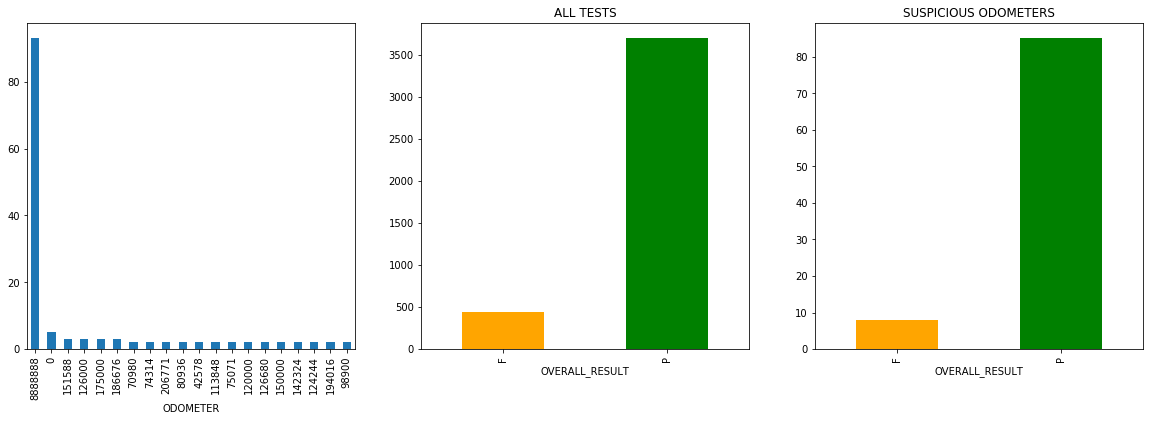

In [51]:
fig, axs = plt.subplots(1, 3, figsize=(20,6))
df[df.STATION_NUM == 'IS341'].groupby('ODOMETER').size().sort_values(ascending=False).head(20).plot.bar(ax=axs[0])
df[df.STATION_NUM == 'IS341'].groupby('OVERALL_RESULT').size().plot.bar(ax=axs[1], title='ALL TESTS', color=['orange', 'green'])
df[(df.STATION_NUM == 'IS341') & (df.ODOMETER == 8888888)].groupby('OVERALL_RESULT').size().plot.bar(ax=axs[2], title='SUSPICIOUS ODOMETERS', color=['orange', 'green'])
plt.show()

## VID_TEST_TYPE

#### not an interesting variable

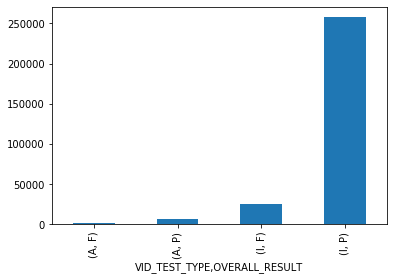

In [53]:
df.groupby(['VID_TEST_TYPE', 'OVERALL_RESULT']).size().plot.bar()
plt.show()

## VEHICLE TYPE, GWR, GVWR 

#### Fails and passes are very evenly distributed over the different vehicle types

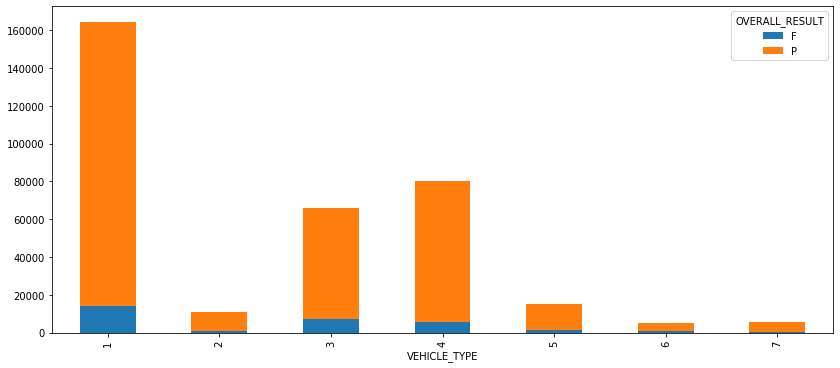

In [54]:
fig, ax = plt.subplots(figsize=(14,6))
df.groupby(['VEHICLE_TYPE', 'OVERALL_RESULT']).size().unstack().plot.bar(stacked=True, ax=ax)
plt.show()

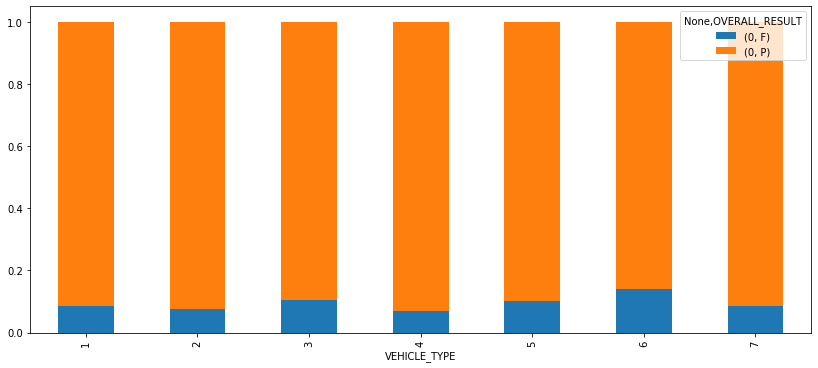

In [55]:
fig, ax = plt.subplots(figsize=(14,6))
pd.DataFrame(df.groupby(['VEHICLE_TYPE', 'OVERALL_RESULT']).size()/df.groupby('VEHICLE_TYPE').size()).unstack().plot.bar(stacked=True, ax=ax)
plt.show()

#### What about aborts? (same, but it introduces the 0, or nan value)

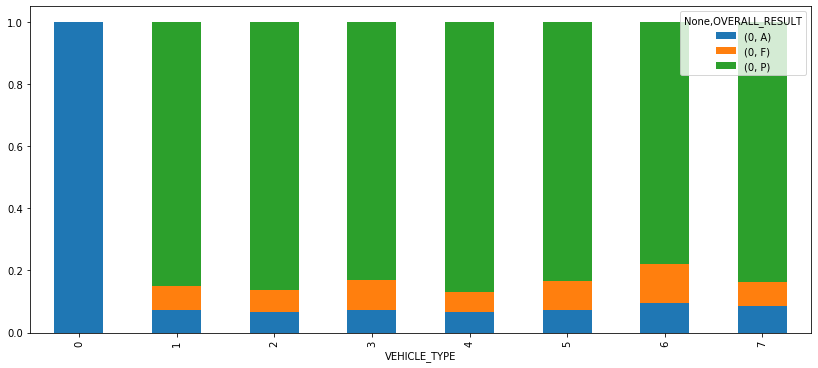

In [56]:
fig, ax = plt.subplots(figsize=(14,6))
pd.DataFrame(df_w_abort.groupby(['VEHICLE_TYPE', 'OVERALL_RESULT']).size()/df_w_abort.groupby('VEHICLE_TYPE').size()).unstack().plot.bar(stacked=True, ax=ax)
plt.show()

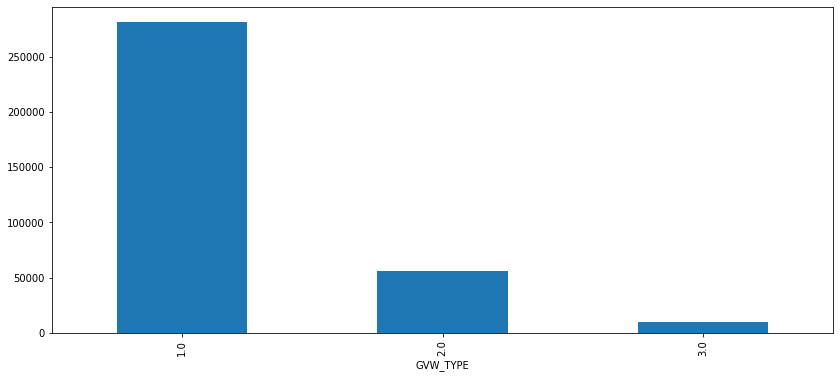

In [57]:
fig, ax = plt.subplots(figsize=(14,6))
df.groupby('GVW_TYPE').size().plot.bar()
plt.show()

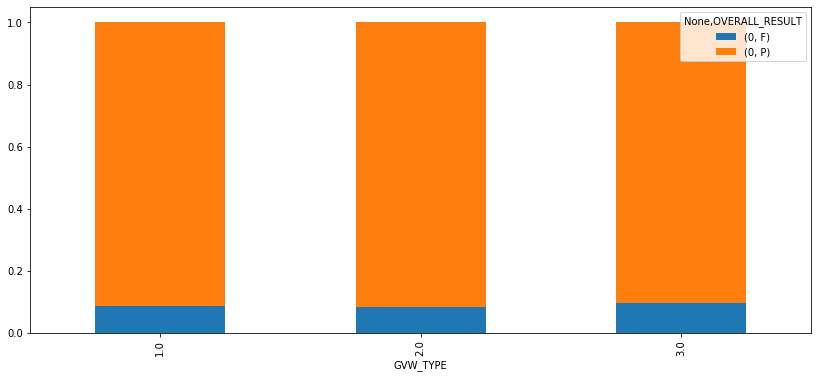

In [58]:
fig, ax = plt.subplots(figsize=(14,6))
pd.DataFrame(df.groupby(['GVW_TYPE', 'OVERALL_RESULT']).size()/df.groupby('GVW_TYPE').size()).unstack().plot.bar(stacked=True, ax=ax)
plt.show()

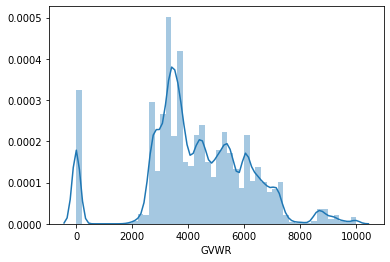

In [59]:
sns.distplot(df.GVWR)
plt.show()

In [ ]:
len(df[df.GVWR == 0])

13233

In [ ]:
len(df[df.GVWR == 0 & df.GVW_TYPE.isna()])

13233

#### GVW type is clearly determined by GVWR, no irregularities here. However, GVWR has some 0 values while GVW_TYPE is complete, so going forward, we should just use the latter

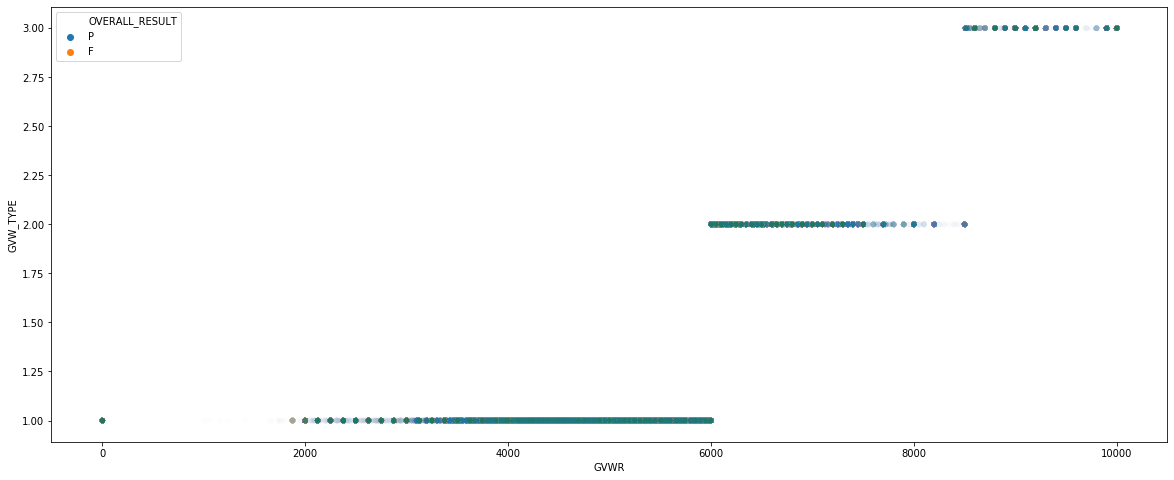

In [60]:
fig, ax = plt.subplots(figsize=(20,8))
sns.scatterplot(data=df, x='GVWR', y='GVW_TYPE', alpha=.01, hue='OVERALL_RESULT')
plt.show()

### FUEL TYPE

#### Diesels pass as often as gas-fueled cars. 'L' has only 10 datapoints and is therefore not representative

In [ ]:
df.groupby('FUEL_TYPE').size()

FUEL_TYPE
B        14
D       333
G    210047
L        10
N        16
X       255
dtype: int64

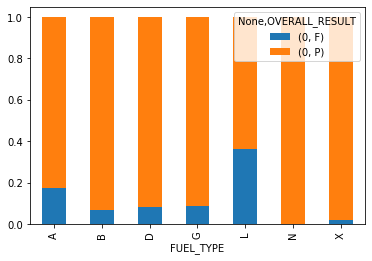

In [61]:
pd.DataFrame(df.groupby(['FUEL_TYPE', 'OVERALL_RESULT']).size()/df.groupby('FUEL_TYPE').size()).unstack().plot.bar(stacked=True)
plt.show()

In [ ]:
round(len(df[df.FUEL_TYPE == 'L']) / len(df), 10)

4.74665e-05

## ZIP CODE

#### Let's look at the zip codes. The first thing to notice is that they have different types: ints, floats and even strings (0, 8710, 87, '-8710' and '8710-' are used to represent nans)


In [ ]:
df.groupby('ZIP_CODE').size().sort_values(ascending=False).head(15)

ZIP_CODE
87110.0    14161
87108.0    12680
87111.0    10855
87114.0    10796
87107.0     9944
87109.0     9942
87112.0     9732
87105.0     9378
87121.0     9044
87123.0     8146
87120.0     7145
87121       6882
87108       6637
87114       6557
87110       6274
dtype: int64

In [ ]:
df[df.ZIP_CODE.isin(['-8710', '8710-', 0, 8710, 87])].head()

,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_SDATE,TEST_EDATE,VIN,VIN_SOURCE,VEH_LICENSE,GVW_TYPE,GVWR,MODEL_YEAR,MAKE,MODEL,CYL,ENGINE_SIZE,TRANS_TYPE,DUAL_EXHAUST,ODOMETER,FUEL_TYPE,VEHICLE_TYPE,ZIP_CODE,CERTIFICATION,ESC,VRT_RECORD_ID,ABORT_CODE,SOFTWARE_VERSION,INSP_COMMENTS,OVERALL_RESULT,ABORT_CODE_OTHER_DESC,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,VID_TEST_TYPE,SDATE,EDATE,DATE_DIST,AGE,MECHANIC_NAME
404,4335453.0,IR106,W074,4924231,2004-09-03 17:16:00,2004-09-03 17:30:00,JHMBB5236FC004650,M,FYA944,1.0,2625,1985,HONDA,PRELUDE,4,2000,M,N,132005,G,1,87,F,3.0,850428,NaN,140.0,NaN,F,NaN,Moya,Jerry,G,NaN,I,2004-09-03,2004-09-03,0 days,20,Jerry_G_Moya
2837,4487786.0,IS309,W078,11714840,2004-12-18 15:34:00,2004-12-18 15:36:00,1FMRU15L0YLC44256,S,NPC44256,2.0,7000,2000,FORD,EXPEDITION,8,5400,A,N,69434,G,4,87,F,20.0,0,NaN,147.0,NaN,P,NaN,Anderson,Michael,S,5.4L,I,2004-12-18,2004-12-18,0 days,5,Michael_S_Anderson
3680,4421413.0,IR203,W047,34000651,2004-07-14 11:32:00,2004-07-14 11:49:00,1GDDM19Z7RB506564,S,213LCL,1.0,4000,1994,GMC,SAFARI,6,4300,A,N,100786,G,5,87,F,11.0,941506,NaN,140.0,NaN,P,NaN,Decoursey,Scott,NaN,NaN,I,2004-07-14,2004-07-14,0 days,11,NaN
6195,4390558.0,IR106,W074,6515398,2004-11-08 12:48:00,2004-11-08 12:56:00,1G2HX53L5N1242922,M,NP242922,1.0,3375,1992,PONTIAC,BONNEVILLE,6,3800,A,N,18062,G,1,0,F,5.0,920349,NaN,141.0,NaN,P,NaN,Moya,Phil,NaN,NaN,I,2004-11-08,2004-11-08,0 days,13,NaN
6461,4472320.0,IS309,W078,11714840,2004-12-07 14:46:00,2004-12-07 14:54:00,2GDHG31KXK4520207,M,DPG175,3.0,10000,1989,GMC,G3500 VANDURA,8,5700,A,N,175526,G,6,87,F,18.0,890970,NaN,141.0,NaN,P,NaN,Anderson,Michael,S,NaN,I,2004-12-07,2004-12-07,0 days,16,Michael_S_Anderson


In [ ]:
len(df[df.ZIP_CODE.isin(['-8710', '8710-', 0, 8710, 87])])

61

In [63]:
df['ZIP_CODE_IMP'] = df.ZIP_CODE.apply(lambda x: 0 if str(x)[-1] == '-' or str(x)[0] == '-' else x)
df['ZIP_CODE_IMP'] = df.ZIP_CODE_IMP.astype(int)

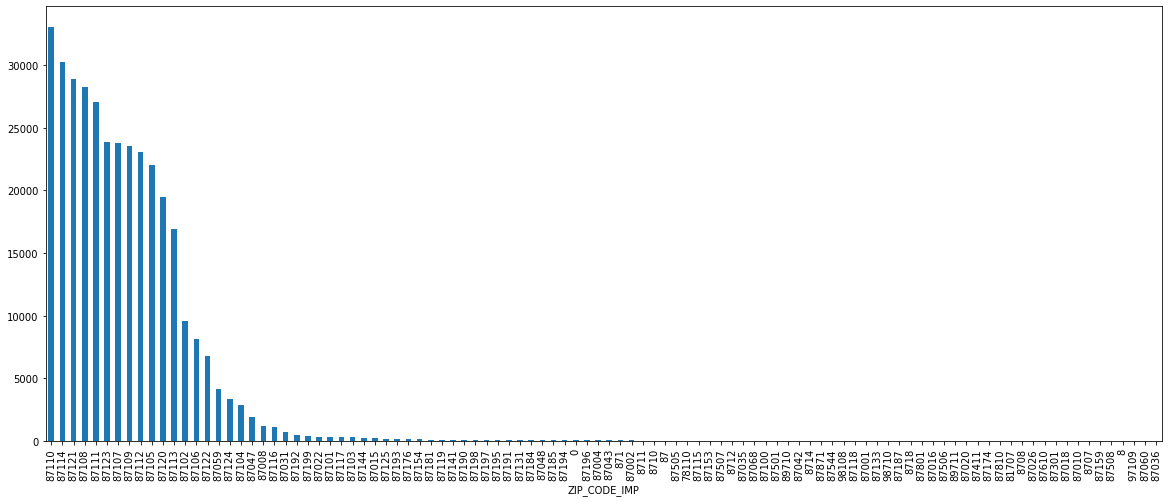

In [64]:
fig, ax = plt.subplots(figsize=(20,8))
df.groupby('ZIP_CODE_IMP').size().sort_values(ascending=False).head(100).plot.bar()
plt.show()

#### There are two clusters: one around the city center (note how at the perifery, cars have a lower age) and one around the very low values (presumably all nans)

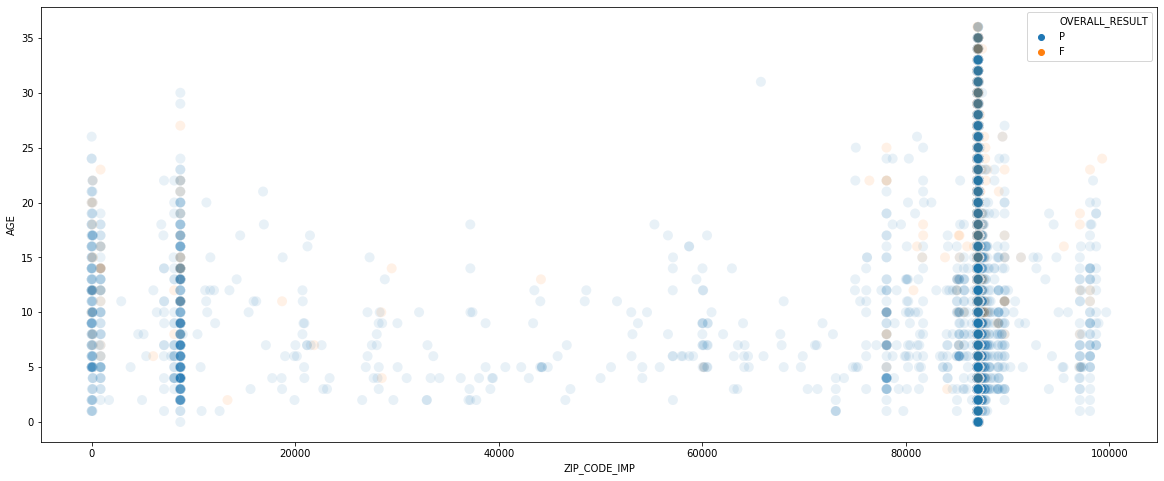

In [65]:
fig, ax = plt.subplots(figsize=(20,8))
sns.scatterplot(data=df, x='ZIP_CODE_IMP', y='AGE', hue='OVERALL_RESULT', s=100, alpha=.1)
plt.show()

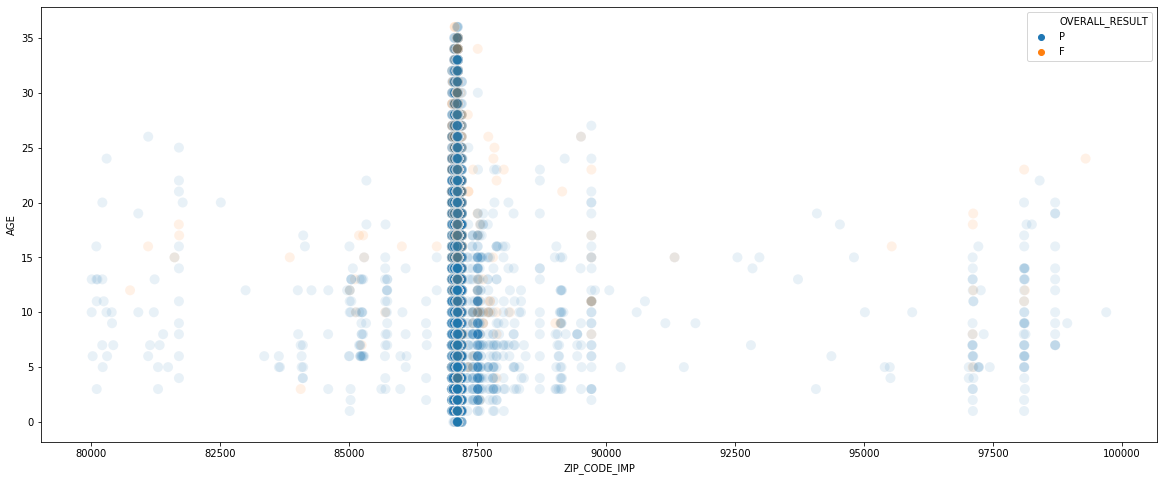

In [66]:
fig, ax = plt.subplots(figsize=(20,8))
sns.scatterplot(data=df[(df.ZIP_CODE_IMP >= 80000) & (df.ZIP_CODE_IMP <= 100000)], x='ZIP_CODE_IMP', y='AGE', hue='OVERALL_RESULT', s=100, alpha=.1)
plt.show()

#### We could use this resource for income by zip code: https://newmexico.hometownlocator.com/zip-codes/zipcodes,city,albuquerque.cfm

## ESC

#### Let's look at ESC again. We have already hypothesized that this is an interesting variale (even though we don't know what it stands for), and that seems to be true. The patterns for the target variable differ greatly among ESC classes (note, however, that some have very low numbers and might not be representative)

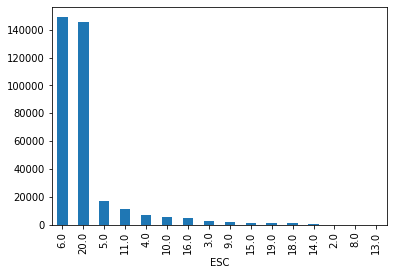

In [67]:
df.groupby('ESC').size().sort_values(ascending=False).plot.bar()
plt.show()

In [68]:
esc_dict = df.groupby('VIN')['ESC'].nunique().to_dict()

In [69]:
len([val for val in esc_dict.values() if val != 1])

1676

In [71]:
df_no_dup = df.drop_duplicates('VIN', keep='first')

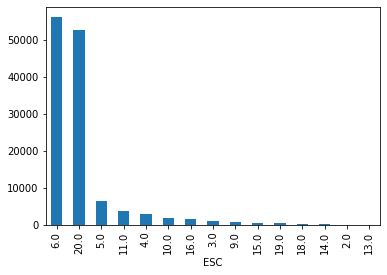

In [72]:
df_no_dup.groupby('ESC').size().sort_values(ascending=False).plot.bar()
plt.show()

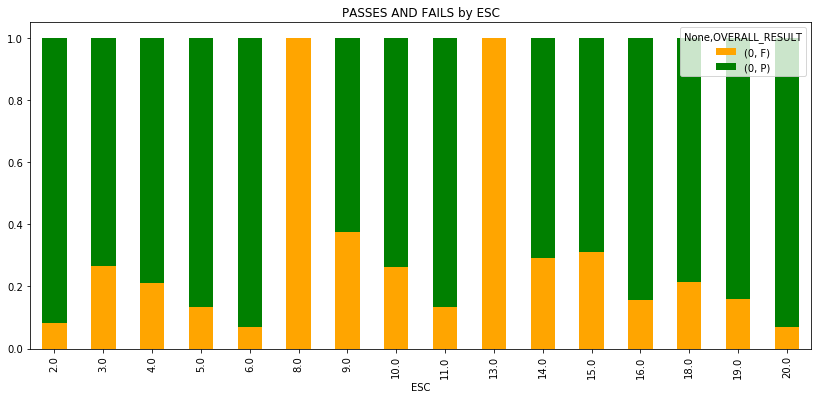

In [73]:
fig, ax = plt.subplots(figsize=(14,6))
pd.DataFrame(df.groupby(['ESC', 'OVERALL_RESULT']).size()/df.groupby('ESC').size()).unstack().plot.bar(ax=ax, stacked=True, color=['orange', 'green'], title='PASSES AND FAILS by ESC')
plt.show()

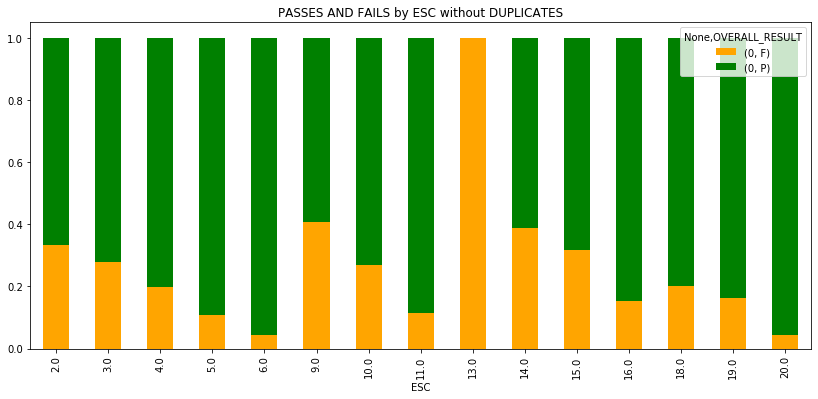

In [74]:
fig, ax = plt.subplots(figsize=(14,6))
pd.DataFrame(df_no_dup.groupby(['ESC', 'OVERALL_RESULT']).size()/df_no_dup.groupby('ESC').size()).unstack().plot.bar(ax=ax, stacked=True, color=['orange', 'green'], title='PASSES AND FAILS by ESC without DUPLICATES')
plt.show()

#### There is a funny pattern by age

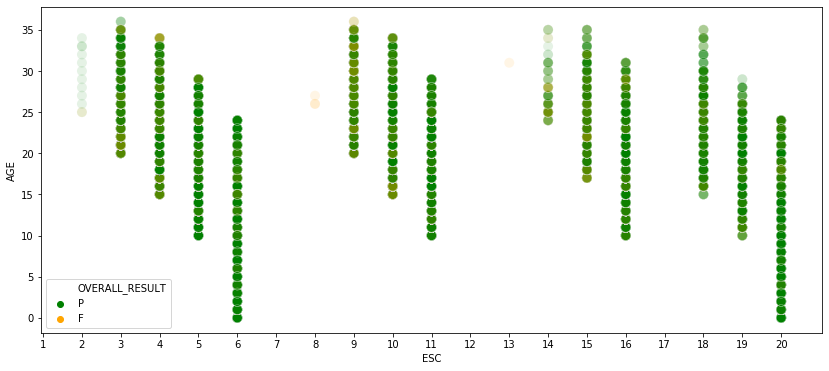

In [75]:
fig, ax = plt.subplots(figsize=(14,6))
plt.xticks(ticks=range(1,21))
sns.scatterplot(data=df, x='ESC', y='AGE', hue='OVERALL_RESULT', s=100, alpha=.1, palette=colordict)
plt.show()

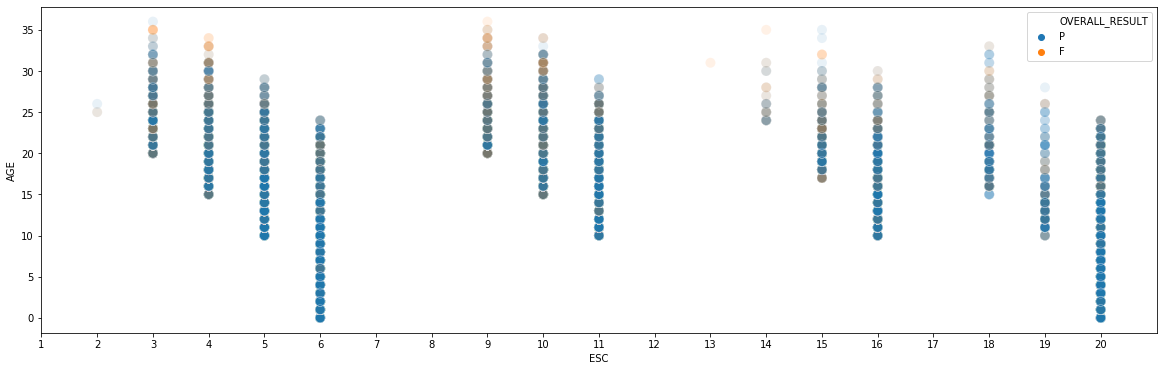

In [76]:
fig, ax = plt.subplots(figsize=(20,6))
plt.xticks(ticks=range(1,21))
sns.scatterplot(data=df_no_dup, x='ESC', y='AGE', hue='OVERALL_RESULT', s=100, alpha=.1)
plt.show()

#### Some classes seem more likely to fail even with low odometer values (9, 14, 15?)

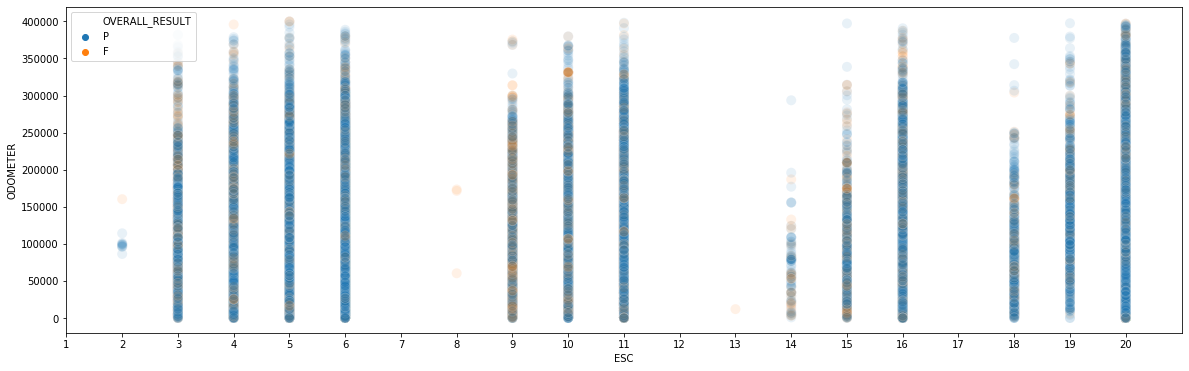

In [77]:
fig, ax = plt.subplots(figsize=(20,6))
plt.xticks(ticks=range(1,21))
sns.scatterplot(data=df[df.ODOMETER < 400000], x='ESC', y='ODOMETER', hue='OVERALL_RESULT', s=100, alpha=.1)
plt.show()

## MODEL & MAKE

#### Maybe it's enough to include a few highly represented brand and group the others under one label 

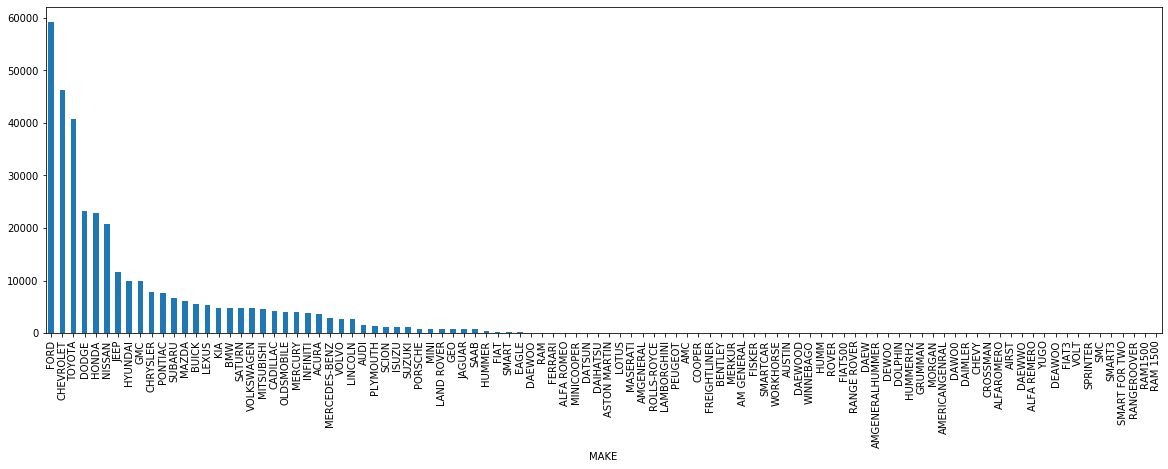

In [78]:
fig, ax = plt.subplots(figsize=(20,6))
df.groupby('MAKE').size().sort_values(ascending=False).head(100).plot.bar()
plt.show()

In [81]:
gb = df.groupby('MAKE')#.size().sort_values(ascending=False).head(100)
size = gb.size()
size[size > 100].index

Index(['ACURA', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER',
       'DODGE', 'EAGLE', 'FIAT', 'FORD', 'GEO', 'GMC', 'HONDA', 'HUMMER',
       'HYUNDAI', 'INFINITI', 'ISUZU', 'JAGUAR', 'JEEP', 'KIA', 'LAND ROVER',
       'LEXUS', 'LINCOLN', 'MAZDA', 'MERCEDES-BENZ', 'MERCURY', 'MINI',
       'MITSUBISHI', 'NISSAN', 'OLDSMOBILE', 'PLYMOUTH', 'PONTIAC', 'PORSCHE',
       'SAAB', 'SATURN', 'SCION', 'SMART', 'SUBARU', 'SUZUKI', 'TOYOTA',
       'VOLKSWAGEN', 'VOLVO'],
      dtype='object', name='MAKE')

In [82]:
frequent_cars = df[df.MAKE.isin(size[size >= 500].index)]

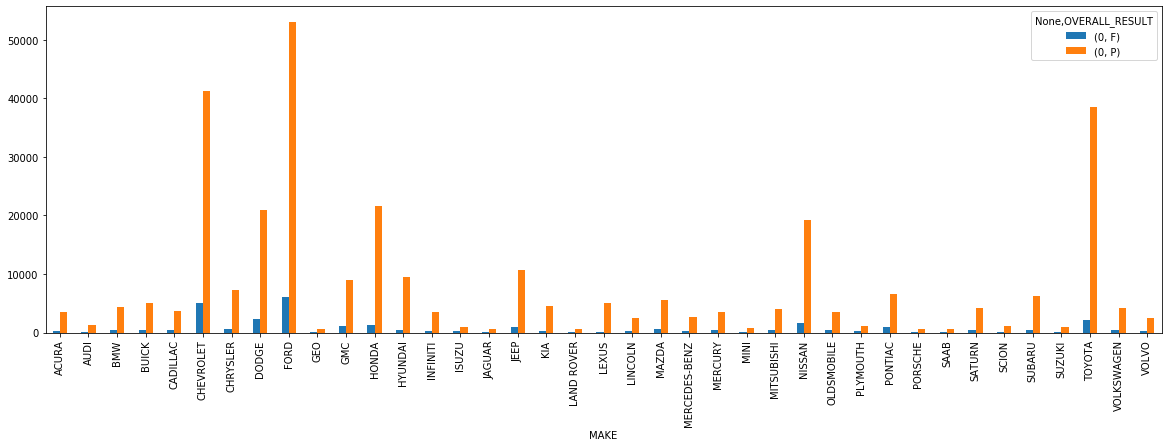

In [83]:
fig, ax = plt.subplots(figsize=(20,6))
pd.DataFrame(frequent_cars.groupby(['MAKE', 'OVERALL_RESULT']).size()).unstack().plot.bar(ax=ax)
plt.show()

#### Some brands seem to fail more often than others. Need to look into the absolute numbers and how representative these ratios are (note that only brands with more than 500 datapoints are included) 

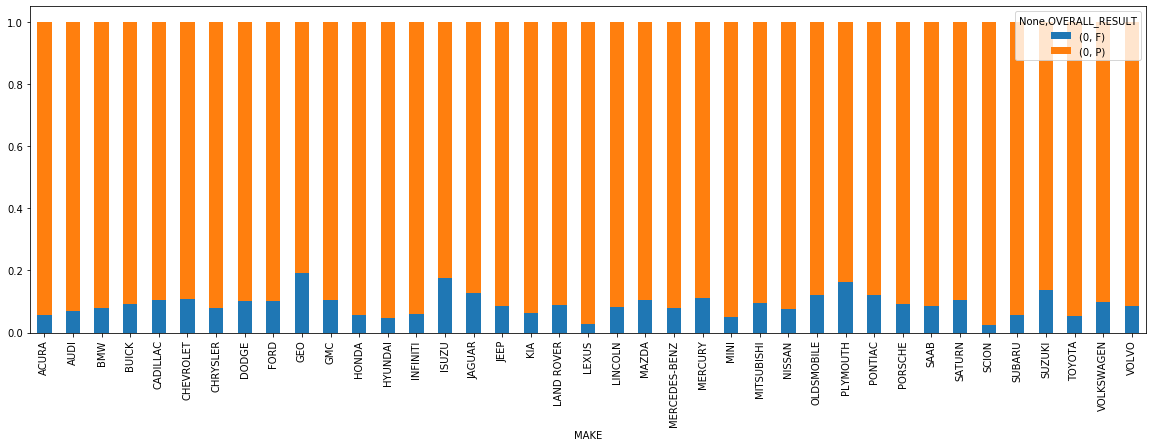

In [84]:
fig, ax = plt.subplots(figsize=(20,6))
pd.DataFrame(frequent_cars.groupby(['MAKE', 'OVERALL_RESULT']).size()/frequent_cars.groupby('MAKE').size()).unstack().plot.bar(ax=ax, stacked=True)
plt.show()

#### Plymouth and Geo are old cars, Subaru, Saturn, Scion and Kia are newer

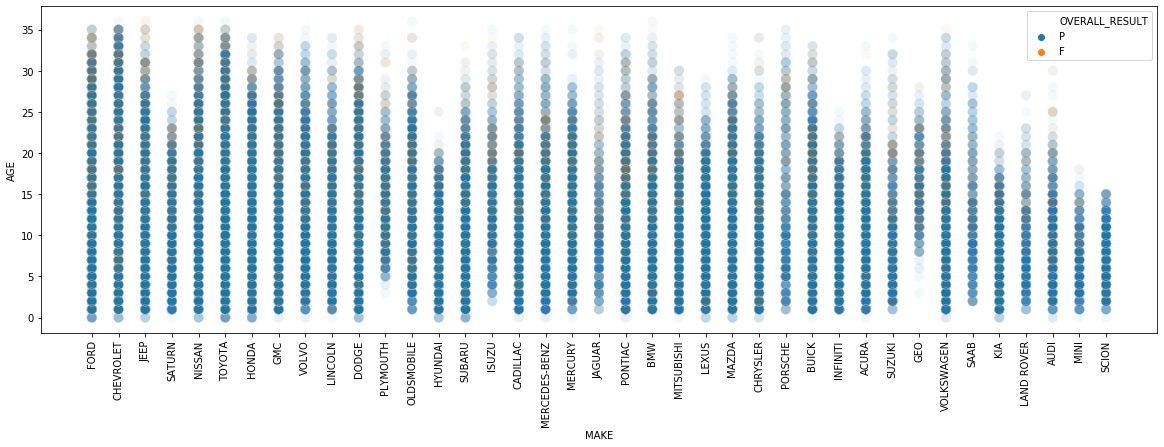

In [85]:
fig, ax = plt.subplots(figsize=(20,6))
plt.xticks(rotation=90)
sns.scatterplot(data=frequent_cars, x='MAKE', y='AGE', hue='OVERALL_RESULT', s=100, alpha=.05)
plt.show()

#### Lots of fords in the 8888888 group

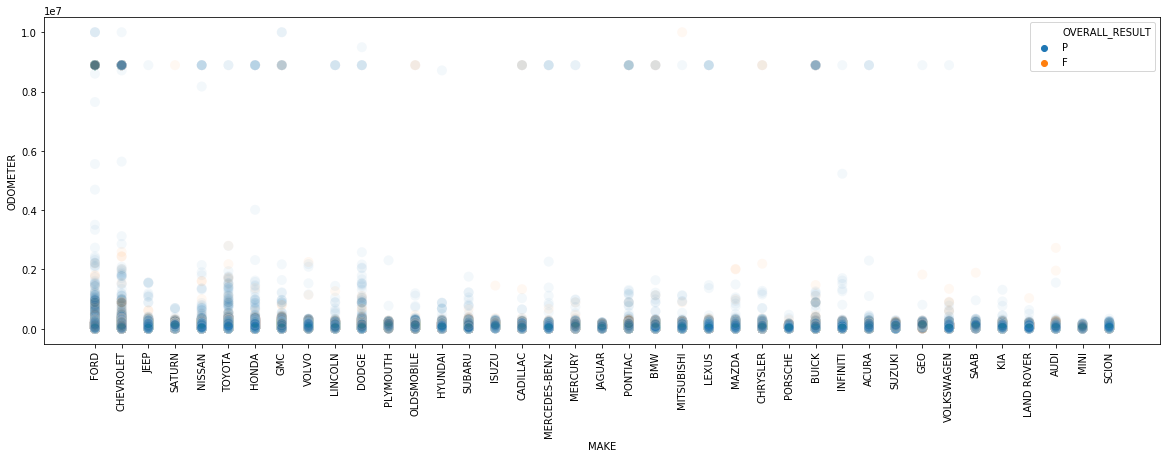

In [86]:
fig, ax = plt.subplots(figsize=(20,6))
plt.xticks(rotation=90)
sns.scatterplot(data=frequent_cars, x='MAKE', y='ODOMETER', hue='OVERALL_RESULT', s=100, alpha=.05)
plt.show()

In [ ]:
len(df[df.ODOMETER == 8888888]), len(df[(df.MAKE == 'FORD') & (df.ODOMETER == 8888888)]), len(df[(df.MAKE == 'CHEVROLET') & (df.ODOMETER == 8888888)])

(126, 47, 19)

In [ ]:
df[df.ODOMETER == 8888888].groupby('MAKE').size().sort_values(ascending=False)

MAKE
FORD             47
CHEVROLET        19
BUICK             9
HONDA             7
PONTIAC           6
LEXUS             5
NISSAN            4
CADILLAC          4
LINCOLN           4
ACURA             3
GMC               3
CHRYSLER          3
DODGE             2
OLDSMOBILE        2
TOYOTA            2
VOLKSWAGEN        1
GEO               1
MERCEDES-BENZ     1
MERCURY           1
SATURN            1
JEEP              1
dtype: int64

#### Fords seem to be able to rack up a higher odometer count (but they are also the largest group)

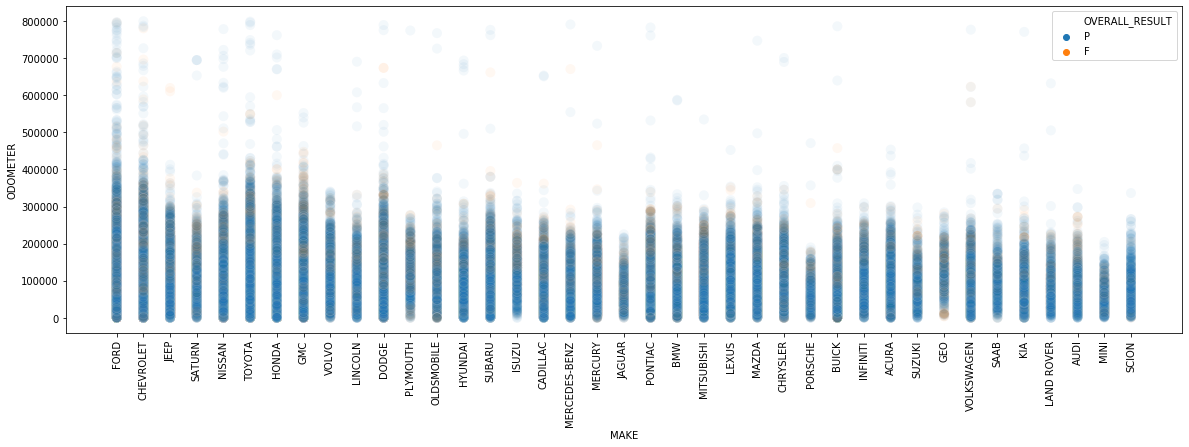

In [87]:
fig, ax = plt.subplots(figsize=(20,6))
plt.xticks(rotation=90)
sns.scatterplot(data=frequent_cars[frequent_cars.ODOMETER < 800000], x='MAKE', y='ODOMETER', hue='OVERALL_RESULT', s=100, alpha=.05)
plt.show()

In [ ]:
df[df.ODOMETER == 100000].groupby('MAKE').size().sort_values(ascending=False)

MAKE
FORD             39
CHEVROLET        32
TOYOTA           19
HONDA            18
NISSAN           10
DODGE             8
PONTIAC           7
JEEP              6
MERCURY           6
CHRYSLER          5
GMC               5
PLYMOUTH          5
OLDSMOBILE        4
VOLVO             3
LINCOLN           3
MAZDA             3
MITSUBISHI        3
SATURN            3
MERCEDES-BENZ     3
BUICK             2
CADILLAC          2
BMW               2
ACURA             2
GEO               2
ISUZU             2
JAGUAR            1
VOLKSWAGEN        1
SUBARU            1
LEXUS             1
dtype: int64